<CENTER>
    <a href="http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html" class="icons"><img src="../../images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

# Construindo os histogramas dos jatos

In [1]:
import ROOT #importando o root

Welcome to JupyROOT 6.24/00


In [2]:
f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_105985.WW.root") 
# Entre em "http://opendata.atlas.cern/release/samples/MC" e escolha o seu evento. Começaremos com o "mc_105985.WW.root"

In [3]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file.

In [4]:
tree = f.Get("mini")

## Ver o que está dentro de "mini"

In [5]:
tree.Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :   500000 : Total =       143220122 bytes  File  Size =   64712596 *
*        :          : Tree compression factor =   2.21                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :   500000 : Total  Size=    2000881 bytes  File Size  =      10270 *
*Baskets :        5 : Basket Size=     825856 bytes  Compression= 194.78     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :   500000 : Total  Size=    2000899 bytes  File Size  =    1066583 *
*Baskets :        5 : Basket Size=     825856 bytes  Compression=   1.88     *
*...................................................

In [6]:
tree.GetEntries()

500000

## Agora calculares o histograma da variável jet_phi
## Definindo o histograma

In [7]:
hist_jet_phi = ROOT.TH1F("hist_jet_phi","Exemplo de grafico: Coordenada phi dos jatos; radianos ; Eventos ",10,-4,4)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas.
#O quarto e o quinto argumentos são o intervalo da abscissa.

In [8]:
type(tree.jet_phi) #Vê o tipo da variável tree.jet_phi

cppyy.LowLevelView

In [9]:
type(tree.mcWeight) #Vê o tipo da variável tree.mcWeight

float

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [10]:
for event in tree:                      # laço que analisa cada evento na tree
    print(tree.mcWeight)                # vê o valor do mcWeight
    for i in tree.jet_phi:              # analisa cada valor de jet_phi, valores estes referente ao jato (alljet_n)
     hist_jet_phi.Fill(i,tree.mcWeight) #constrói o histograma da multiplicação do jet_phi com o mcWeight(massa)
    
print("Done!")

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [11]:
hist_jet_phi.SetFillColor(38) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_phi.Draw()           

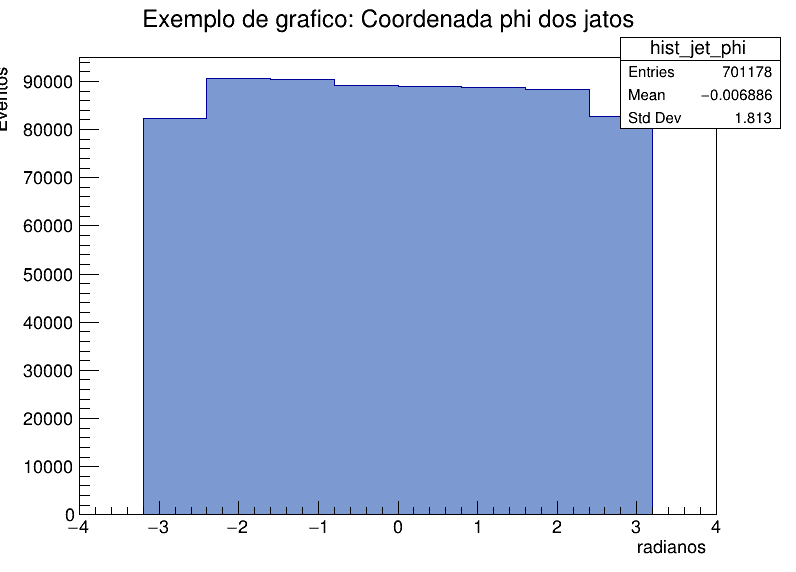

In [12]:
canvas.Draw()                 #desenha o histograma

In [13]:
scale = hist_jet_phi.Integral()
hist_jet_phi.Scale(1/scale)
hist_jet_phi.SetFillColor(2)

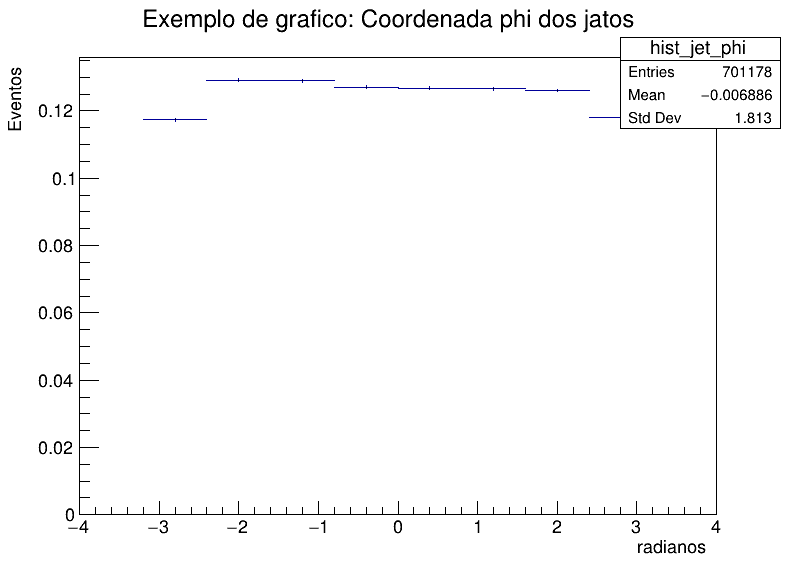

In [14]:
hist_jet_phi.Draw()
canvas.Draw("hist_jet_phi")

**Done!**

## Agora calculares o histograma da variável jet_eta
## Definindo o histograma

In [15]:
hist_jet_eta = ROOT.TH1F("hist_jet_eta","Exemplo de grafico: Coordenada eta dos jatos;  ; Eventos ",10,-4,4)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [16]:
type(tree.jet_eta) #Vê o tipo da variável tree.jet_eta

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [17]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_eta:              # analisa cada valor de jet_eta, valores estes referente ao jato (alljet_n)
     hist_jet_eta.Fill(i,tree.mcWeight) #constrói o histograma da multiplicação do jet_eta com o mcWeight(massa)
    
print("Done!")

Done!


In [18]:
hist_jet_eta.SetFillColor(37) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_eta.Draw()

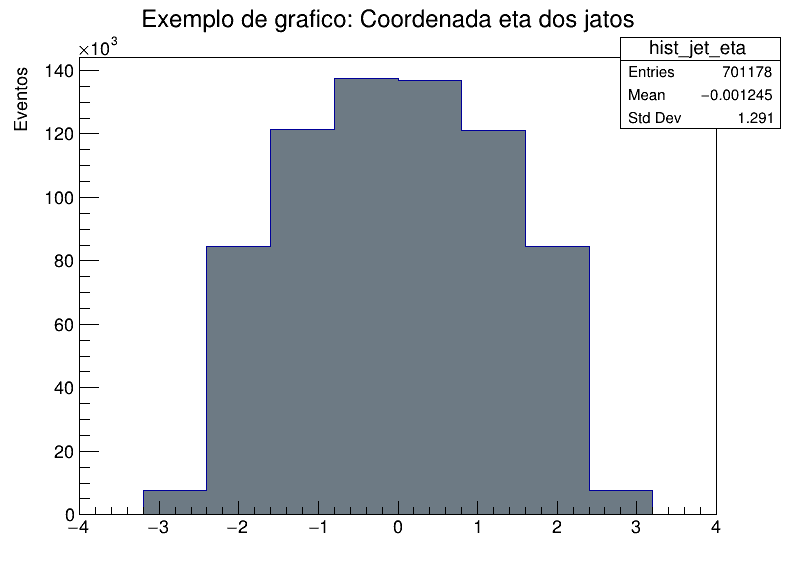

In [19]:
canvas.Draw()                 #desenha o histograma

In [20]:
scale = hist_jet_eta.Integral()
hist_jet_eta.Scale(1/scale)
hist_jet_eta.SetFillColor(2)

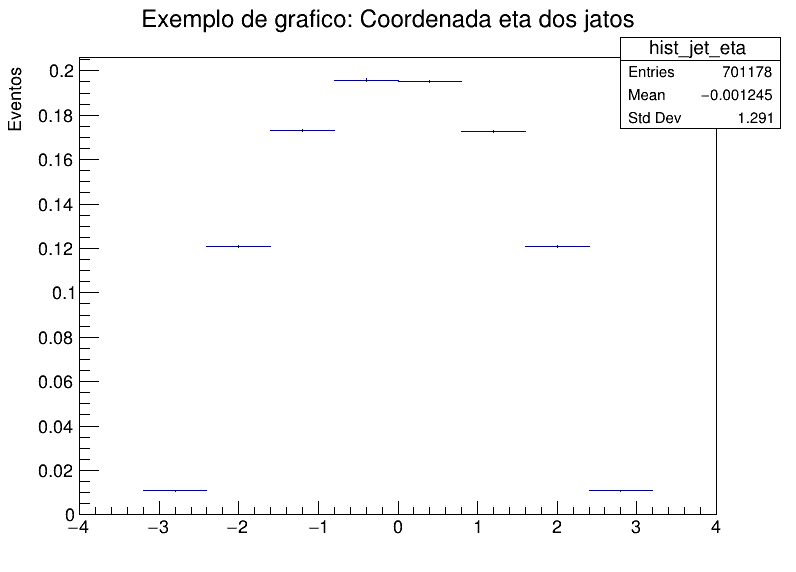

In [21]:
hist_jet_eta.Draw()
canvas.Draw("hist_jet_eta")

## Agora calculares o histograma da variável jet_n
## Definindo o histograma

In [22]:
hist_jet_n = ROOT.TH1F("hist_jet_n","Exemplo de grafico: Coordenada n dos jatos;  ; Eventos ",10,0,4)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [23]:
type(tree.jet_n) #Vê o tipo da variável tree.jet_n

int

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [24]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
     hist_jet_n.Fill(tree.jet_n,tree.mcWeight) #faça deste jeito para um número inteiro
    
print("Done!")

Done!


In [25]:
hist_jet_n.SetFillColor(34) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_n.Draw()

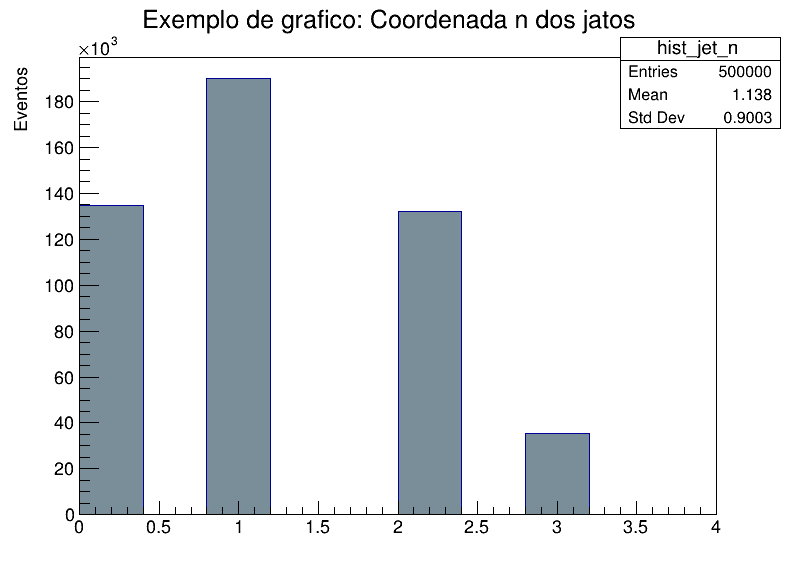

In [26]:
canvas.Draw()                 #desenha o histograma

In [27]:
scale = hist_jet_n.Integral()
hist_jet_n.Scale(1/scale)
hist_jet_n.SetFillColor(2)

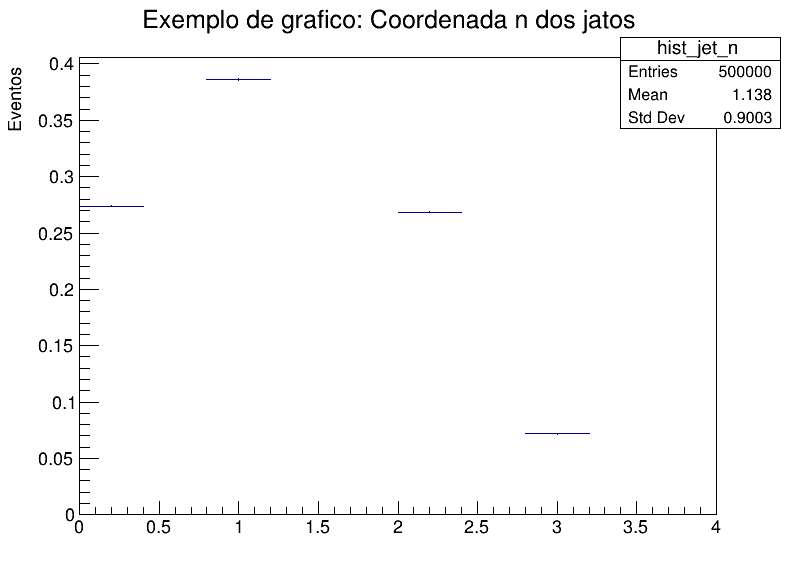

In [28]:
hist_jet_n.Draw()
canvas.Draw("hist_jet_n")

## Agora calculares o histograma da variável alljet_n
## Definindo o histograma

In [29]:
hist_alljet_n = ROOT.TH1F("hist_alljet_n","Exemplo de grafico: Coordenada de alljet_n dos jatos;  ; Eventos ",10,0,4)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [30]:
type(tree.alljet_n) #Vê o tipo da variável tree.alljet_n

int

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [31]:
for event in tree:                                   # laço que analisa cada evento na tree
                                                     # print(tree.mcWeight) processo já feito
     hist_alljet_n.Fill(tree.alljet_n,tree.mcWeight) #faça deste jeito para um número inteiro
    
print("Done!")

Done!


In [32]:
hist_alljet_n.SetFillColor(35) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_alljet_n.Draw()

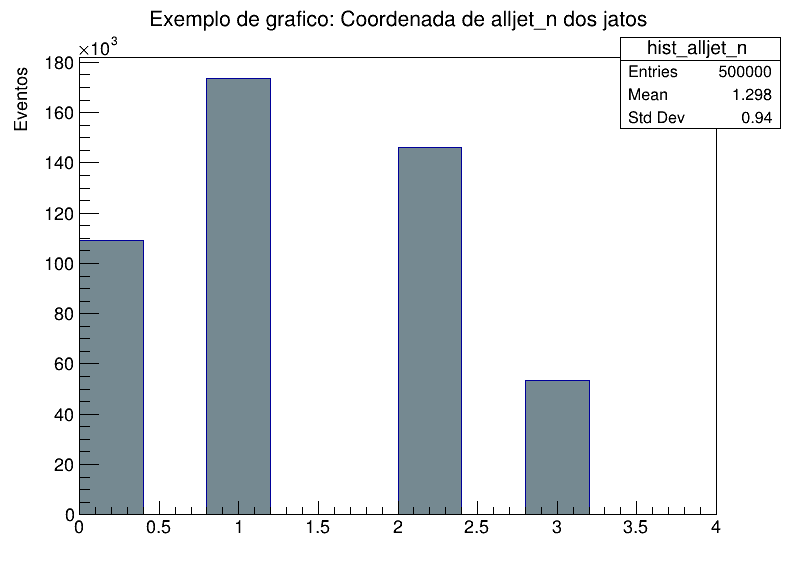

In [33]:
canvas.Draw()                 #desenha o histograma

In [34]:
scale = hist_alljet_n.Integral()
hist_alljet_n.Scale(1/scale)
hist_alljet_n.SetFillColor(2)

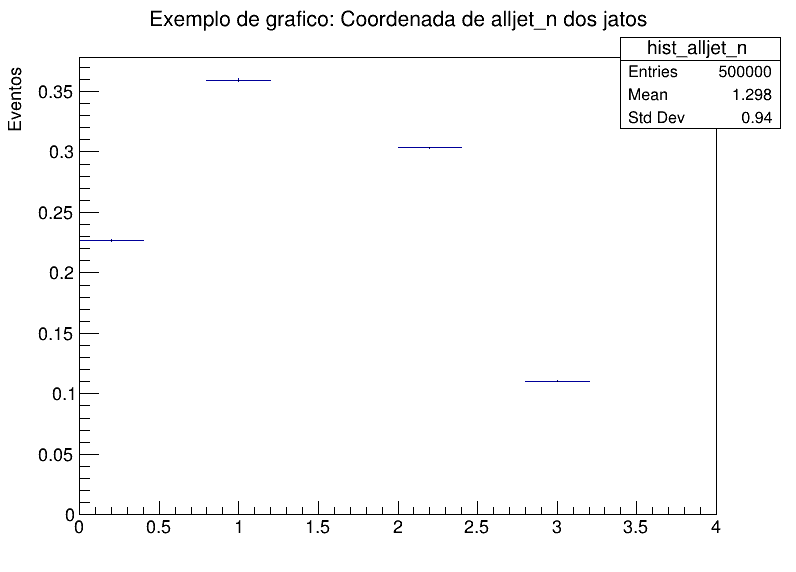

In [35]:
hist_alljet_n.Draw()
canvas.Draw("hist_alljet_n")

## Agora calculares o histograma da variável jet_pt
## Definindo o histograma

In [36]:
hist_jet_pt = ROOT.TH1F("hist_jet_pt","Exemplo de grafico: Coordenada pt dos jatos; Gev ; Eventos ",10,0,350)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [37]:
type(tree.jet_pt) #Vê o tipo da variável tree.jet_pt

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [38]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_pt:              # analisa cada valor de jet_pt, valores estes referente ao jato (alljet_n)
     hist_jet_pt.Fill(i/1000,tree.mcWeight) #constrói o histograma da multiplicação do jet_pt com o mcWeight(massa)
    
print("Done!")

Done!


In [39]:
hist_jet_pt.SetFillColor(36) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_pt.Draw()

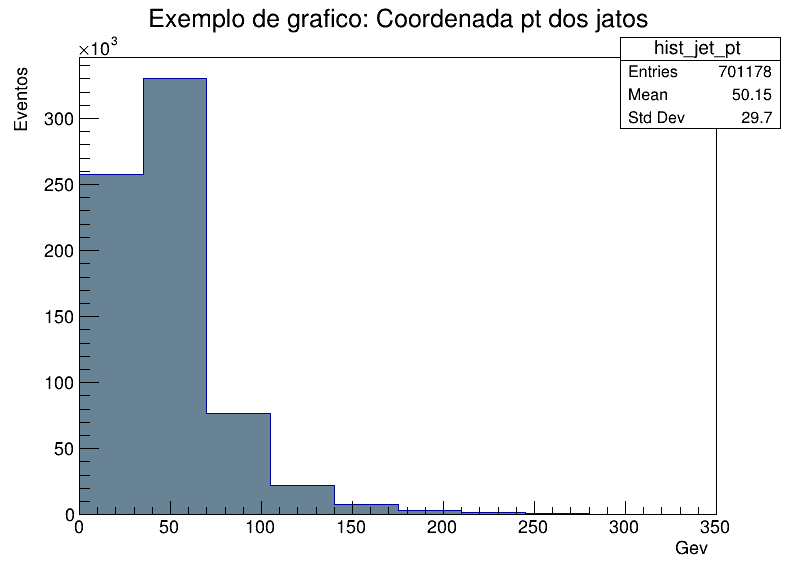

In [40]:
canvas.Draw()                 #desenha o histograma

In [41]:
scale = hist_jet_pt.Integral()
hist_jet_pt.Scale(1)             #se dividir para normalizar por zero vai dar erro
hist_jet_pt.SetFillColor(2)

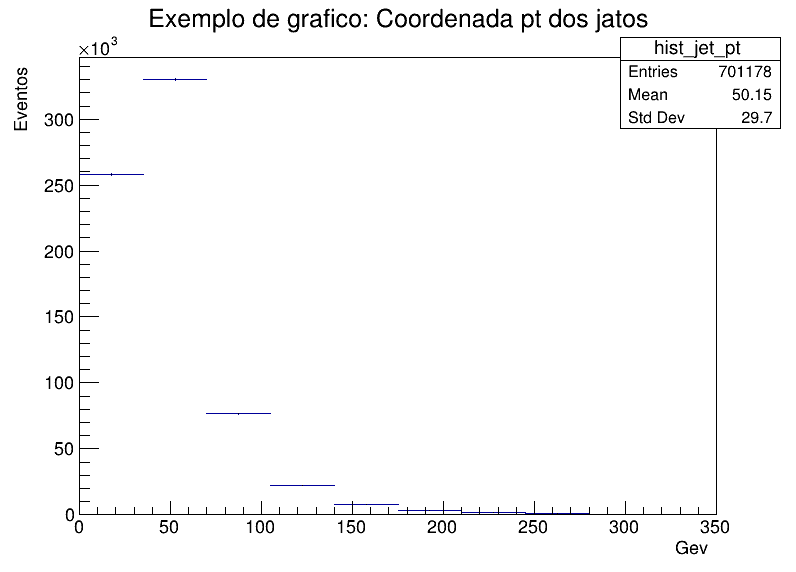

In [42]:
hist_jet_pt.Draw()
canvas.Draw("hist_jet_pt")

## Agora calculares o histograma da variável jet_E
## Definindo o histograma

In [43]:
hist_jet_E = ROOT.TH1F("hist_jet_E","Exemplo de grafico: Coordenada E dos jatos; Gev ; Eventos ",10,0,800)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [44]:
type(tree.jet_E) #Vê o tipo da variável tree.jet_E

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [45]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_E:              # analisa cada valor de jet_E, valores estes referente ao jato (alljet_n)
     hist_jet_E.Fill(i/1000,tree.mcWeight) #constrói o histograma da multiplicação do jet_E com o mcWeight(massa)
    
print("Done!")

Done!


In [46]:
hist_jet_E.SetFillColor(39) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_E.Draw()

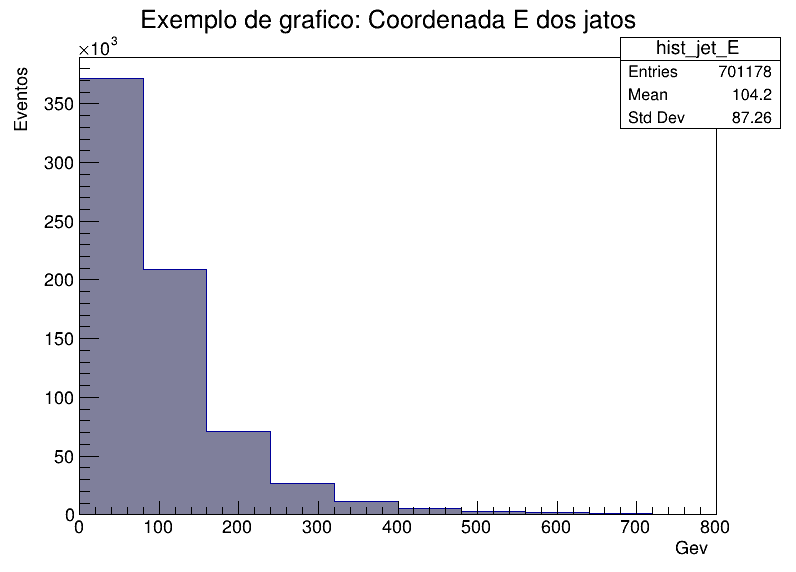

In [47]:
canvas.Draw()                 #desenha o histograma

In [48]:
scale = hist_jet_E.Integral()
hist_jet_E.Scale(1)             #se dividir para normalizar por zero vai dar erro
hist_jet_E.SetFillColor(2)

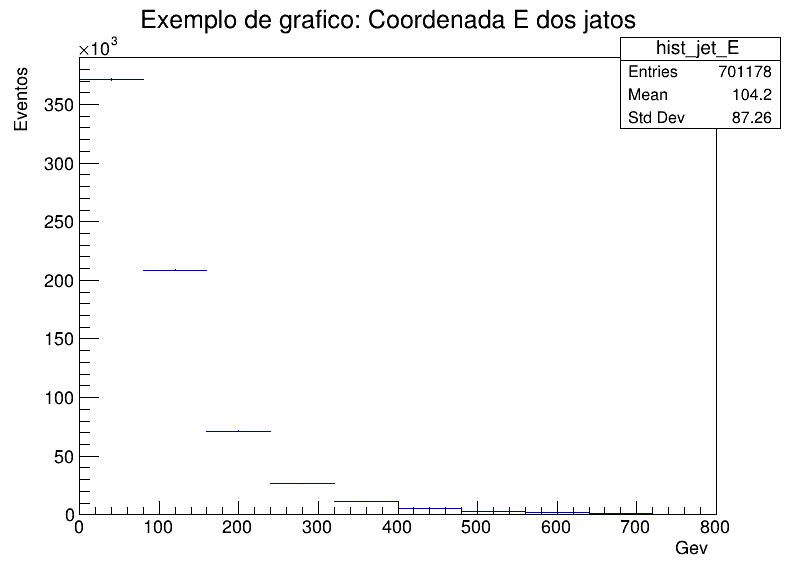

In [49]:
hist_jet_E.Draw()
canvas.Draw("hist_jet_E")

## Agora calculares o histograma da variável jet_m
## Definindo o histograma

In [50]:
hist_jet_m = ROOT.TH1F("hist_jet_m","Exemplo de grafico: Coordenada m dos jatos;  ; Eventos ",10,0,35000)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [51]:
type(tree.jet_m) #Vê o tipo da variável tree.jet_m

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [52]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_m:              # analisa cada valor de jet_m, valores estes referente ao jato (alljet_n)
     hist_jet_m.Fill(i,tree.mcWeight) #constrói o histograma da multiplicação do jet_m com o mcWeight(massa)
    
print("Done!")

Done!


In [53]:
hist_jet_m.SetFillColor(40) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_m.Draw()

In [54]:
canvas.Draw()                 #desenha o histograma

In [55]:
scale = hist_jet_m.Integral()
hist_jet_m.Scale(1/scale)
hist_jet_m.SetFillColor(2)

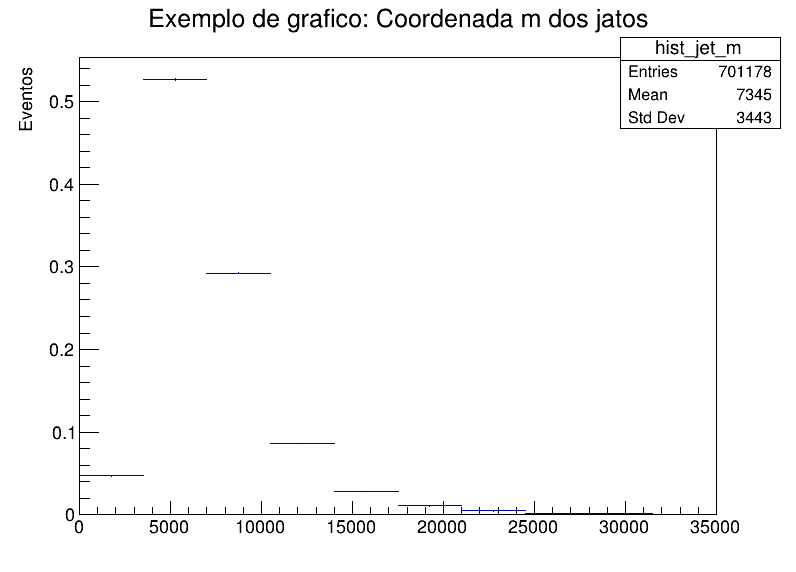

In [56]:
hist_jet_m.Draw()
canvas.Draw("hist_jet_m")

## Agora calculares o histograma da variável jet_jvf
## Definindo o histograma

In [57]:
hist_jet_jvf = ROOT.TH1F("hist_jet_jvf","Exemplo de grafico: Coordenada jvf dos jatos;  ; Eventos ",10,0,2)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [58]:
type(tree.jet_jvf) #Vê o tipo da variável tree.jet_jvf

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [59]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_jvf:              # analisa cada valor de jet_jvf, valores estes referente ao jato (alljet_n)
     hist_jet_jvf.Fill(i,tree.mcWeight) #constrói o histograma da multiplicação do jet_jvf com o mcWeight(massa)
    
print("Done!")

Done!


In [60]:
hist_jet_jvf.SetFillColor(41) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_jvf.Draw()

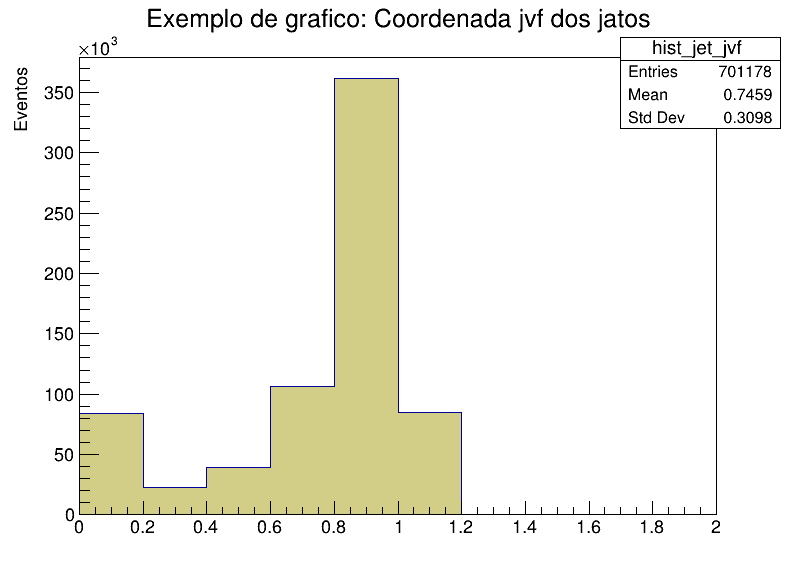

In [61]:
canvas.Draw()                 #desenha o histograma

In [62]:
scale = hist_jet_jvf.Integral()
hist_jet_jvf.Scale(1/scale)
hist_jet_jvf.SetFillColor(2)

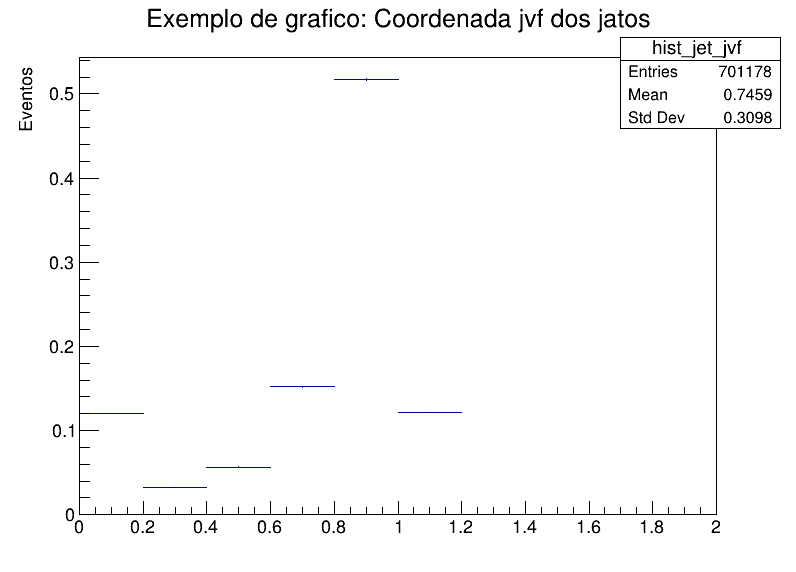

In [63]:
hist_jet_jvf.Draw()
canvas.Draw("hist_jet_jvf")

## Agora calculares o histograma da variável jet_trueflav
## Definindo o histograma

In [64]:
hist_jet_trueflav = ROOT.TH1F("hist_jet_trueflav","Exemplo de grafico: Coordenada trueflav dos jatos;  ; Eventos ",10,0,1)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [65]:
type(tree.jet_trueflav) #Vê o tipo da variável tree.jet_trueflav

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [66]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_trueflav:              # analisa cada valor de jet_trueflav, valores estes referente ao jato (alljet_n)
     hist_jet_trueflav.Fill(i,tree.mcWeight) #constrói o histograma da multiplicação do jet_trueflav com o mcWeight(massa)
    
print("Done!")

Done!


In [67]:
hist_jet_trueflav.SetFillColor(42) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_trueflav.Draw()

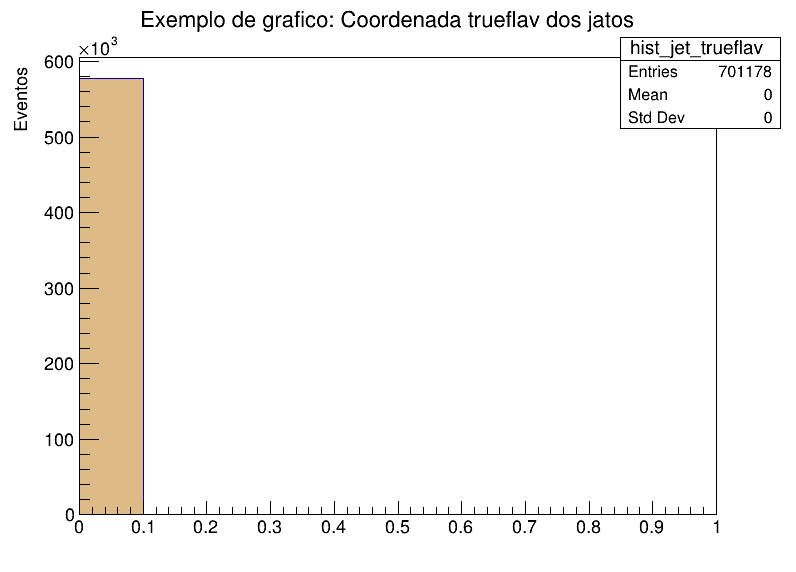

In [68]:
canvas.Draw()                 #desenha o histograma

In [69]:
scale = hist_jet_trueflav.Integral()
hist_jet_trueflav.Scale(1/scale)
hist_jet_trueflav.SetFillColor(2)

In [70]:
hist_jet_trueflav.Draw()
canvas.Draw("hist_jet_trueflav")

## Agora calculares o histograma da variável jet_truthMatched
## Definindo o histograma

In [71]:
hist_jet_truthMatched = ROOT.TH1F("hist_jet_truthMatched","Exemplo de grafico: Coordenada truthMatched dos jatos;  ; Eventos ",10,0,2)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [72]:
type(tree.jet_truthMatched) #Vê o tipo da variável tree.jet_truthMatched

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [73]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_truthMatched:              # analisa cada valor de jet_truthMatched, valores estes referente ao jato (alljet_n)
     hist_jet_truthMatched.Fill(i,tree.mcWeight) #constrói o histograma da multiplicação do jet_truthMatched com o mcWeight(massa)
    
print("Done!")

Done!


In [74]:
hist_jet_truthMatched.SetFillColor(43) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_truthMatched.Draw()

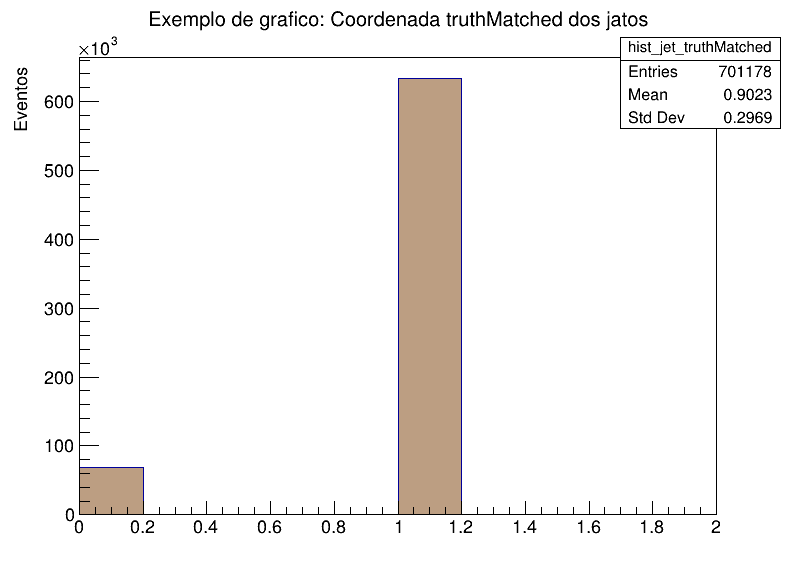

In [75]:
canvas.Draw()                 #desenha o histograma

In [76]:
scale = hist_jet_truthMatched.Integral()
hist_jet_truthMatched.Scale(1/scale)
hist_jet_truthMatched.SetFillColor(2)

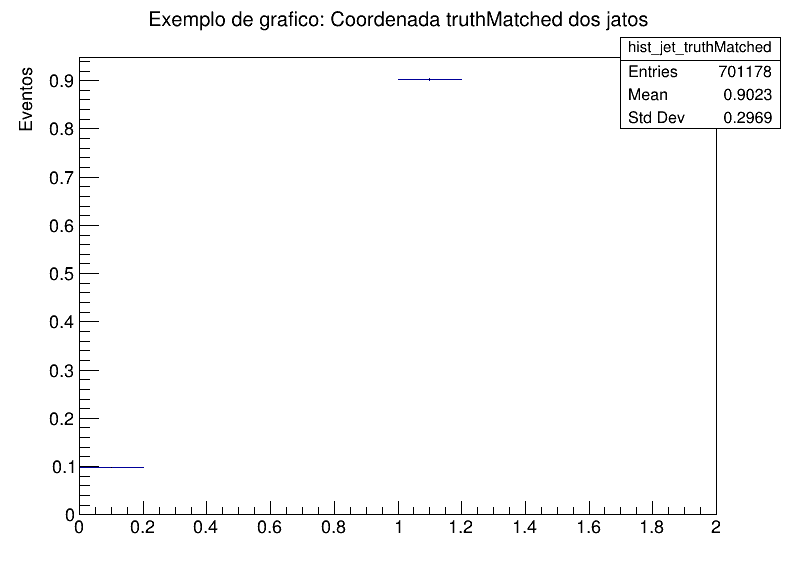

In [77]:
hist_jet_truthMatched.Draw()
canvas.Draw("hist_jet_truthMatched")

## Agora calculares o histograma da variável jet_SV0
## Definindo o histograma

In [78]:
hist_jet_SV0 = ROOT.TH1F("hist_jet_SV0","Exemplo de grafico: Coordenada SV0 dos jatos;  ; Eventos ",10,0,1)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [79]:
type(tree.jet_SV0) #Vê o tipo da variável tree.jet_SV0

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [80]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_SV0:              # analisa cada valor de jet_SV0, valores estes referente ao jato (alljet_n)
     hist_jet_SV0.Fill(i,tree.mcWeight) #constrói o histograma da multiplicação do jet_SV0 com o mcWeight(massa)
    
print("Done!")

Done!


In [81]:
hist_jet_SV0.SetFillColor(44) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_SV0.Draw()

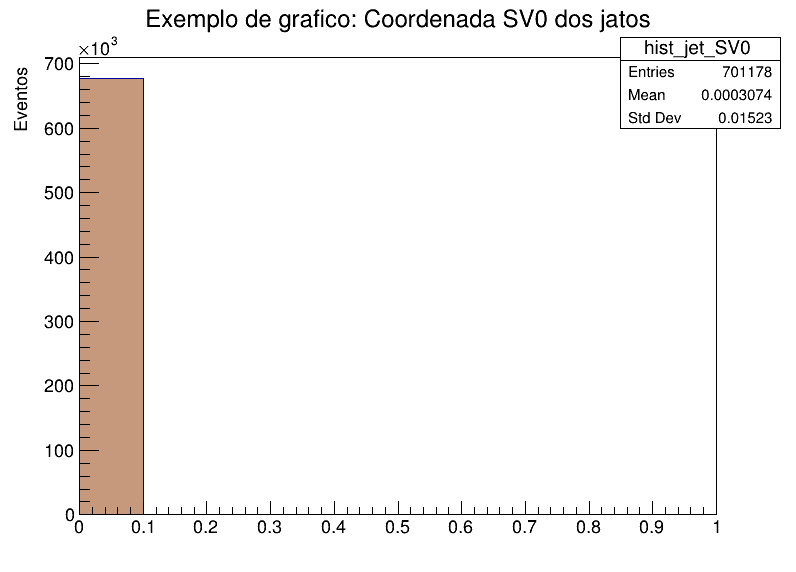

In [82]:
canvas.Draw()                 #desenha o histograma

In [83]:
scale = hist_jet_SV0.Integral()
hist_jet_SV0.Scale(1/scale)
hist_jet_SV0.SetFillColor(2)

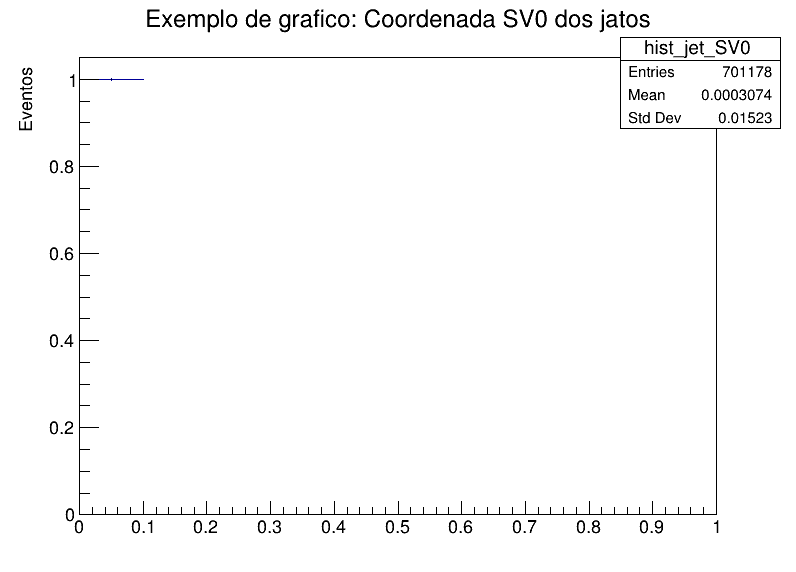

In [84]:
hist_jet_SV0.Draw()
canvas.Draw("hist_jet_SV0")

## Agora calculares o histograma da variável jet_MV1
## Definindo o histograma

In [85]:
hist_jet_MV1 = ROOT.TH1F("hist_jet_MV1","Exemplo de grafico: Coordenada MV1 dos jatos;  ; Eventos ",10,0,2)
#Recomendo que o nome do histograma e do primeiro argumento seja um nome condizente com a variável escolhida.
#O segundo argumento é o nome do título, da abscissa e da ordenada, respectivamente.
#O terceiro argumento é o número de divisões do eixo das abscissas
#O quarto e o quinto argumentos são o intervalo da abscissa

In [86]:
type(tree.jet_MV1) #Vê o tipo da variável tree.jet_MV1

cppyy.LowLevelView

## O tempo demorado dependerá da sua máquina e da sua internet
## Caso você queira encontrar o resultado em Gev basta dividir o "i" por mil (i/1000)

In [87]:
for event in tree:                      # laço que analisa cada evento na tree
                                        # print(tree.mcWeight) processo já feito
    for i in tree.jet_MV1:              # analisa cada valor de jet_MV1, valores estes referente ao jato (alljet_n)
     hist_jet_MV1.Fill(i,tree.mcWeight) #constrói o histograma da multiplicação do jet_MV1 com o mcWeight(massa)
    
print("Done!")

Done!


In [88]:
hist_jet_MV1.SetFillColor(45) #escolha a cor do seu histograma. Recomendo que escolha uma cor para cada histograma
hist_jet_MV1.Draw()

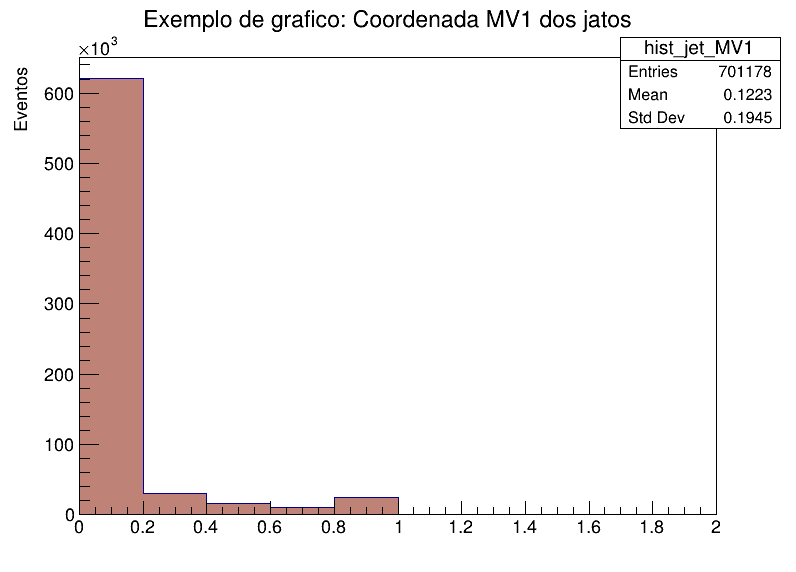

In [89]:
canvas.Draw()                 #desenha o histograma

In [90]:
hist_jet_MV1scale = hist_jet_MV1.Integral()
hist_jet_MV1.Scale(1/scale)
hist_jet_MV1.SetFillColor(2)

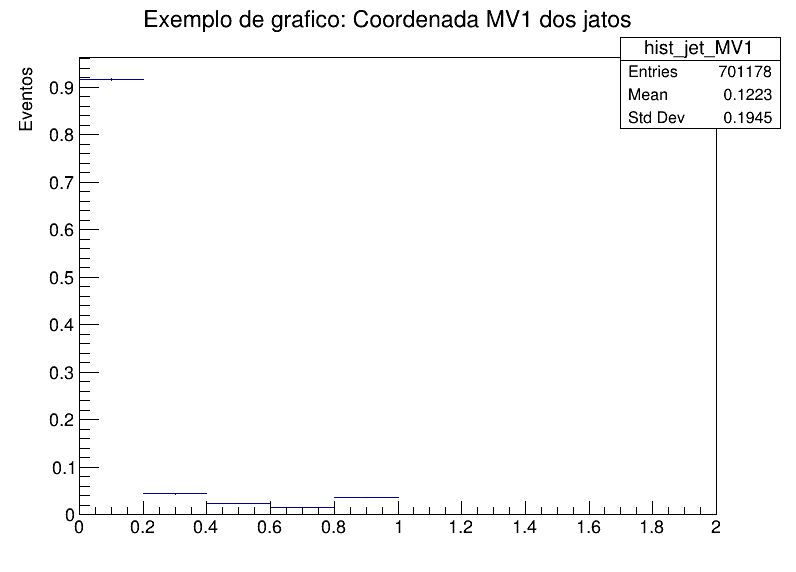

In [91]:
hist_jet_MV1.Draw()
canvas.Draw("hist_jet_MV1")